In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def explorar_grupo(grupo, nivel=0):
    indent = '  ' * nivel
    for key in grupo:
        item = grupo[key]
        if isinstance(item, h5py.Group):
            print(f"{indent}Grupo: {key}")
            explorar_grupo(item, nivel + 1)
        elif isinstance(item, h5py.Dataset):
            print(f"{indent}Dataset: {key}, shape: {item.shape}, dtype: {item.dtype}")

filename = '/home/reyguadarrama/GSoC/data/quark-gluon_test-set_n139306.hdf5'


with h5py.File(filename, 'r') as f:
    explorar_grupo(f)
    # # Leer el dataset 'X'

    X_jets = f['X_jets'][:2000]
    print(f"X_jets shape: {X_jets.shape}, dtype: {X_jets.dtype}")

    # Leer el dataset m0
    m0 = f['m0'][:2000]
    print(f"m0 shape: {m0.shape}, dtype: {m0.dtype}")

    # Leer el dataset pt
    pt = f['pt'][:2000]
    print(f"pt shape: {pt.shape}, dtype: {pt.dtype}")

    # Leer el dataset y
    y = f['y'][:2000]
    print(f"y shape: {y.shape}, dtype: {y.dtype}")

Dataset: X_jets, shape: (139306, 125, 125, 3), dtype: float32
Dataset: m0, shape: (139306,), dtype: float32
Dataset: pt, shape: (139306,), dtype: float32
Dataset: y, shape: (139306,), dtype: float32
X_jets shape: (2000, 125, 125, 3), dtype: float32
m0 shape: (2000,), dtype: float32
pt shape: (2000,), dtype: float32
y shape: (2000,), dtype: float32


In [3]:
zeros = 0
ones = 0
for label in y:
    if label == 0.0:
        zeros += 1
    else:
        ones += 1

In [4]:
print(zeros, ones)

975 1025


In [5]:
# Índices de las dos clases
indices_clase_0 = np.where(y == 0)[0]
indices_clase_1 = np.where(y == 1)[0]

# Datos de la clase 0
X_jets_clase_0 = X_jets[indices_clase_0]
m0_clase_0 = m0[indices_clase_0]
pt_clase_0 = pt[indices_clase_0]
y_clase_0 = y[indices_clase_0]

# Datos de la clase 1
X_jets_clase_1 = X_jets[indices_clase_1]
m0_clase_1 = m0[indices_clase_1]
pt_clase_1 = pt[indices_clase_1]
y_clase_1 = y[indices_clase_1]


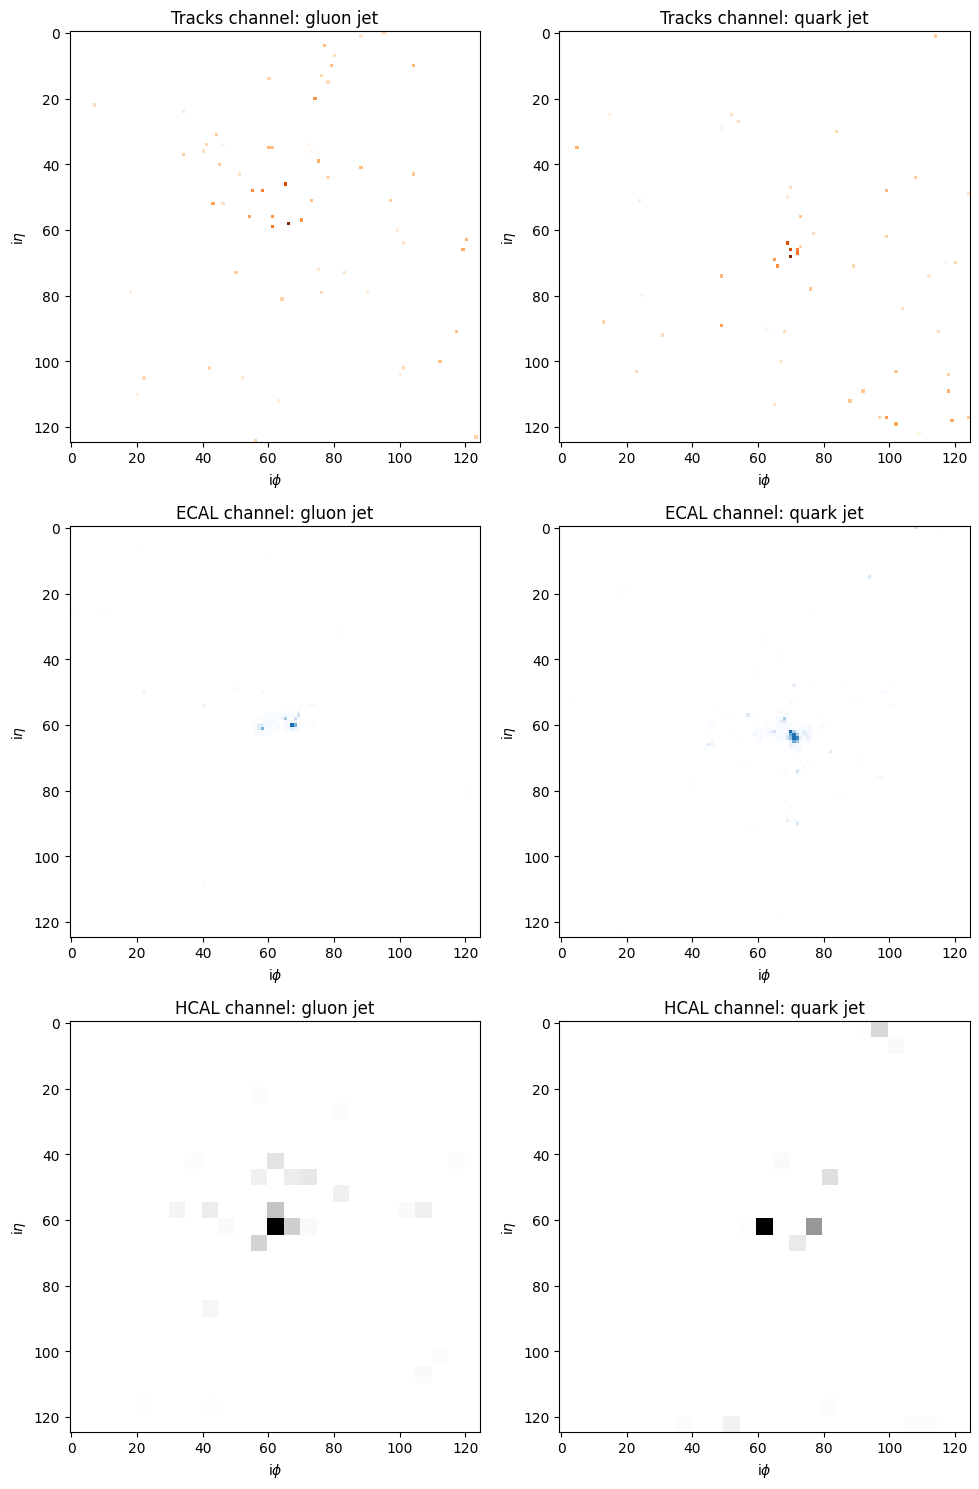

In [28]:
n = 2

# Define a LogNorm for logarithmic scaling
norm = mcolors.LogNorm()

fig, axs = plt.subplots(3, 2, figsize=(10, 15)) 

# Titles for each subplot
titles_clase_0 = ["Tracks channel: gluon jet", "ECAL channel: gluon jet", "HCAL channel: gluon jet"]
titles_clase_1 = ["Tracks channel: quark jet", "ECAL channel: quark jet", "HCAL channel: quark jet"]
cmaps = ["Oranges", "Blues", "Greys"]
norms = [norm, norm, None]


# Plot gluon images
for i in range(3):
    axs[i, 0].imshow(X_jets_clase_0[n, :, :, i], cmap=cmaps[i], norm=norms[i])
    axs[i, 0].set_title(titles_clase_0[i])

# Plot quark images
for i in range(3):
    axs[i, 1].imshow(X_jets_clase_1[n, :, :, i], cmap=cmaps[i], norm=norms[i])
    axs[i, 1].set_title(titles_clase_1[i])


for ax in axs.flat:
    ax.set(xlabel='i$\phi$', ylabel='i$\eta$')


# Improve layout
plt.tight_layout()
plt.show()


In [31]:
X_jets_clase_0[:,:,:,0].shape

(975, 125, 125)

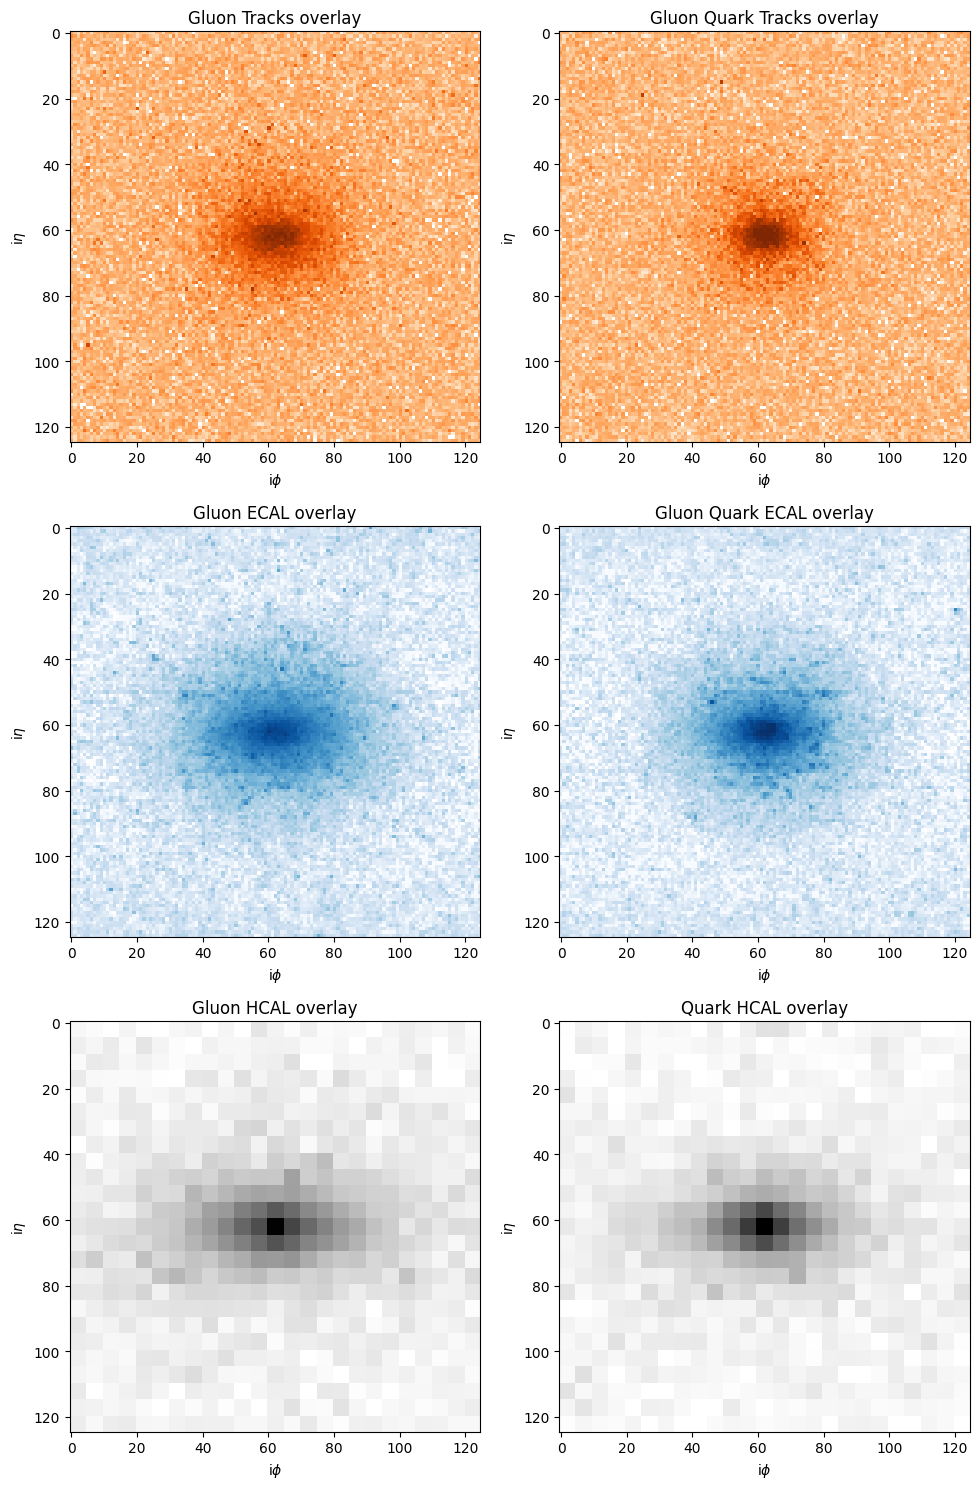

In [41]:
gluon_tracks_overlay = np.mean(X_jets_clase_0[:,:,:,0], axis=0)
gluon_ECAL_overlay = np.mean(X_jets_clase_0[:,:,:,1], axis=0)
gluon_HCAL_overlay = np.mean(X_jets_clase_0[:,:,:,2], axis=0)
quark_tracks_overlay = np.mean(X_jets_clase_1[:,:,:,0], axis=0)
quark_ECAL_overlay = np.mean(X_jets_clase_1[:,:,:,1], axis=0)
quark_HCAL_overlay = np.mean(X_jets_clase_1[:,:,:,2], axis=0)

# Define a LogNorm for logarithmic scaling
norm = mcolors.LogNorm()

fig, axs = plt.subplots(3, 2, figsize=(10, 15)) 

axs[0, 0].imshow(gluon_tracks_overlay, cmap="Oranges", norm=norm)
axs[0, 0].set_title("Gluon Tracks overlay")

axs[1, 0].imshow(gluon_ECAL_overlay, cmap="Blues", norm=norm)
axs[1, 0].set_title("Gluon ECAL overlay")

axs[2, 0].imshow(gluon_HCAL_overlay, cmap="Grays", norm=norm)
axs[2, 0].set_title("Gluon HCAL overlay")

axs[0, 1].imshow(quark_tracks_overlay, cmap="Oranges", norm=norm)
axs[0, 1].set_title("Gluon Quark Tracks overlay")

axs[1, 1].imshow(quark_ECAL_overlay, cmap="Blues", norm=norm)
axs[1, 1].set_title("Gluon Quark ECAL overlay")

axs[2, 1].imshow(quark_HCAL_overlay, cmap="Grays", norm=norm)
axs[2, 1].set_title("Quark HCAL overlay")

for ax in axs.flat:
    ax.set(xlabel='i$\phi$', ylabel='i$\eta$')

# Improve layout
plt.tight_layout()
plt.show()


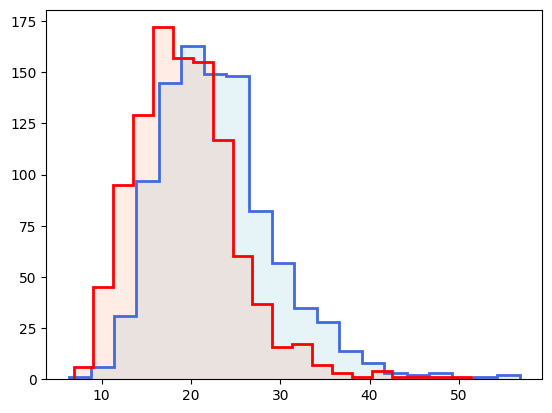

In [60]:
plt.hist(m0_clase_0, bins=20, histtype="step", linewidth=2, label="gluon", color="royalblue")
plt.hist(m0_clase_0, bins=20, histtype="stepfilled", linewidth=2, color="lightblue", alpha=0.3)
plt.hist(m0_clase_1, bins=20, histtype="step", linewidth=2, label="quark", color="red")
plt.hist(m0_clase_1, bins=20, histtype="stepfilled", linewidth=2, color="lightsalmon", alpha=0.2)
plt.show()